# ***GPU ya bağlanma***

In [3]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 155320 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.27-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.27-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.27-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope

In [1]:
!pip install -q keras

Drive üzerinden google collab  kullanımı için gerekli adımlar.

In [4]:
!mkdir -p drive
!google-drive-ocamlfuse drive


In [ ]:
import sys 
sys.ğpath.insert(0,'drive/')

!python3 drive/ 'dosya ismi.py'

Github üzerindeki repo ile colab üzerinde nasıl çalışabilirim?


In [ ]:
!mkdir -p drive
!google-drive-ocamlfuse drive

In [6]:
import os
os.chdir("/content/drive")

In [7]:
!git clone https://github.com/ayyucekizrak/Udemy_DerinOgrenmeyeGiris.git

Cloning into 'Udemy_DerinOgrenmeyeGiris'...
remote: Enumerating objects: 2230, done.
remote: Counting objects: 100% (95/95), done.
remote: Compressing objects: 100% (86/86), done.
remote: Total 2230 (delta 41), reused 34 (delta 8), pack-reused 2135
Receiving objects: 100% (2230/2230), 79.27 MiB | 6.37 MiB/s, done.
Resolving deltas: 100% (1284/1284), done.
Checking out files: 100% (171/171), done.


TİTANİC VERİ GÖRSELLEŞTİRME


In [16]:
import os
os.chdir("/content/drive/Udemy_DerinOgrenmeyeGiris/Titanic Gorsellestirme ve Siniflama")
!pwd

/content/drive/Udemy_DerinOgrenmeyeGiris/Titanic Gorsellestirme ve Siniflama


In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import timeit

#veri kümesini yükleme
titanic=sns.load_dataset('titanic')

In [18]:
#veri seti ile ilgili bilgiler
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


örnek sorgu: aynı cinsiyet grubuna ait 1. ve 3. sınıf ve yaşamıyor olan yolcuların bilet ücretlerini, yolculukta yalnız olup olmadıklarını, ve hangi şehirde olduklarını gözlemleyelim.


In [19]:
titanic[
        (titanic.sex=='female')
        & (titanic['class'].isin(['First','Third']))
        &(titanic.age>30)
        & (titanic.survived==0)
        
]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
18,0,3,female,31.0,1,0,18.0000,S,Third,woman,False,NaN,Southampton,no,False
40,0,3,female,40.0,1,0,9.4750,S,Third,woman,False,NaN,Southampton,no,False
132,0,3,female,47.0,1,0,14.5000,S,Third,woman,False,NaN,Southampton,no,False
167,0,3,female,45.0,1,4,27.9000,S,Third,woman,False,NaN,Southampton,no,False
177,0,1,female,50.0,0,0,28.7125,C,First,woman,False,C,Cherbourg,no,True
254,0,3,female,41.0,0,2,20.2125,S,Third,woman,False,NaN,Southampton,no,False
276,0,3,female,45.0,0,0,7.7500,S,Third,woman,False,NaN,Southampton,no,True
362,0,3,female,45.0,0,1,14.4542,C,Third,woman,False,NaN,Cherbourg,no,False
396,0,3,female,31.0,0,0,7.8542,S,Third,woman,False,NaN,Southampton,no,True
503,0,3,female,37.0,0,0,9.5875,S,Third,woman,False,NaN,Southampton,no,True


In [30]:
# Datadan küçük bir parça çekelim, yaşadıkları şehir, şehirde yaşadıkları süre ve şehir yaşı bilgileri olsun
towns_dic = {
    'name': ['Southampton', 'Cherbourg', 'Queenstown', 'Montevideo'],
    'country': ['United Kingdom', 'France', 'United Kingdom', 'Uruguay'],
    'population': [236900, 37121, 12347, 1305000],
    'age': [np.random.randint(500, 1000) for _ in range(4)]
}
towns_df = pd.DataFrame(towns_dic)


In [31]:
(titanic.merge(
  towns_df,
  left_on='embark_town', right_on='name',
  how='left',
  indicator=True,
  suffixes=('_passenger', '_city')
)).head()

,survived,pclass,sex,age_passenger,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,name,country,population,age_city,_merge
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,Southampton,United Kingdom,236900.0,604.0,both
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,Cherbourg,France,37121.0,943.0,both
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,Southampton,United Kingdom,236900.0,604.0,both
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,Southampton,United Kingdom,236900.0,604.0,both
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,Southampton,United Kingdom,236900.0,604.0,both


distplot: Değişken dağılımı

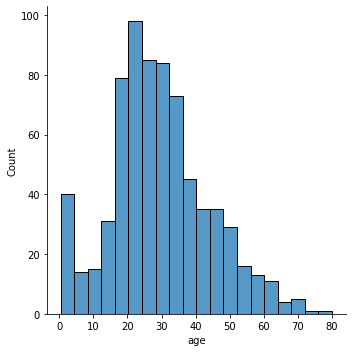

In [33]:
import matplotlib.pyplot as plt

sns.displot(titanic.age.dropna())
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

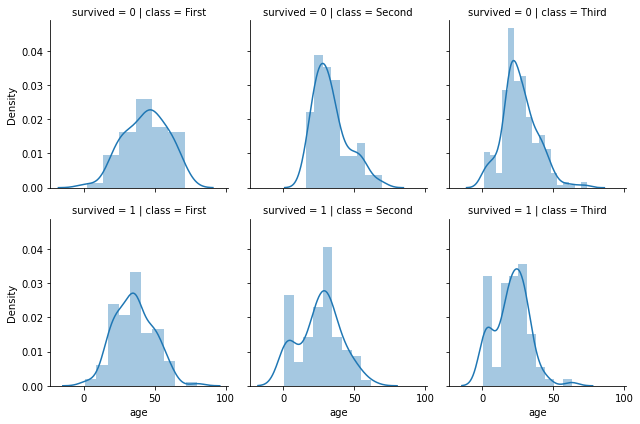

In [35]:
#FacetGrid: kategorilere ayırarak değişken dağılımı

g=sns.FacetGrid(titanic,row='survived', col='class')
g.map(sns.distplot, "age")
plt.show()

jointplot: Bu metot, veri değişkenlerinin hem dağılımları hem de çekirdek yoğunluğu tahmin edicileri ve verilere uyan bir opsiyonel regresyon ile birlikte iki değişkene göre görüntülenmesi için kullanılır. Reg ile, verilere uygun bir regresyon istediğimizi belirtiyoruz. Bu durumda, regresyonun gösterdiği yukarı doğru küçük bir eğilim olduğu görünse de, Pearson korelasyon katsayısı ile gösterildiği gibi “yaş” ve “ücret” değişkenleri arasında hemen hemen hiçbir ilişki yoktur.

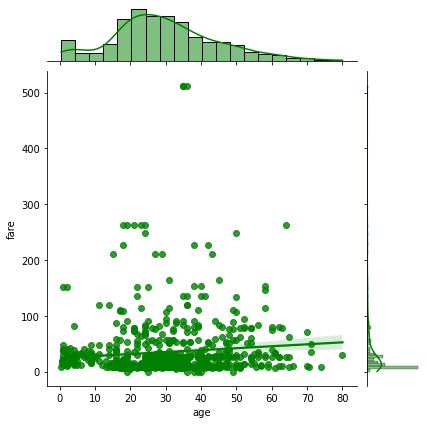

In [36]:
sns.jointplot(data=titanic,x='age',y='fare',kind='reg',color='g')
plt.show()

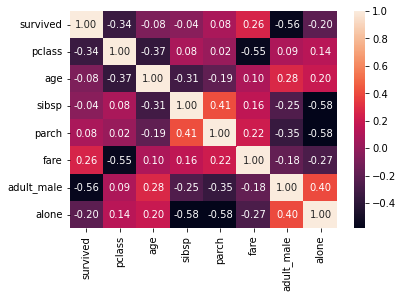

In [41]:
#korelasyon matrisi
sns.heatmap(titanic.corr(), annot=True, fmt=".2f")
plt.show()
